# HSC vs MPP Clone Abundance Comparison
Comparison done for `figure 3` as an initial look at clone level data

In [2]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import data_utils.data_loader as ld
import plot_utils.format_axis as fmt
import plot_utils.overlay_plots as op
import importlib

In [3]:
importlib.reload(ld)
loader = ld.HSPC_data_loader('../primary_config.json')
palette = ld.load_config('../color_palette.json')

Finding data files from: /Users/akre96/Data/Human_HSPC_Project/Primary recipients /STEP 7
	Found 13 files
Loading and transforming to long format
Marking parent cells by library ID
Validating data
Data Validation Passed


In [4]:
data = loader.data.copy()
data.groupby(['condition', 'parent_cell_type'])['abundance'].describe(percentiles=[.5])

count      mean       std  min       50%  \
condition     parent_cell_type                                             
Busulfan      hsc               298.0  0.427130  1.686229  0.0  0.052325   
              mpp                81.0  0.367289  1.372321  0.0  0.034585   
Irradiation   hsc               189.0  0.879333  3.424988  0.0  0.048189   
              mpp                56.0  0.110186  0.232833  0.0  0.033015   
Unconditioned hsc               156.0  0.654555  2.739573  0.0  0.015177   
              mpp                78.0  0.210870  0.585536  0.0  0.017975   

                                      max  
condition     parent_cell_type             
Busulfan      hsc               22.255805  
              mpp               11.065906  
Irradiation   hsc               27.606305  
              mpp                1.373160  
Unconditioned hsc               20.073078  
              mpp                3.760403

Line is Median


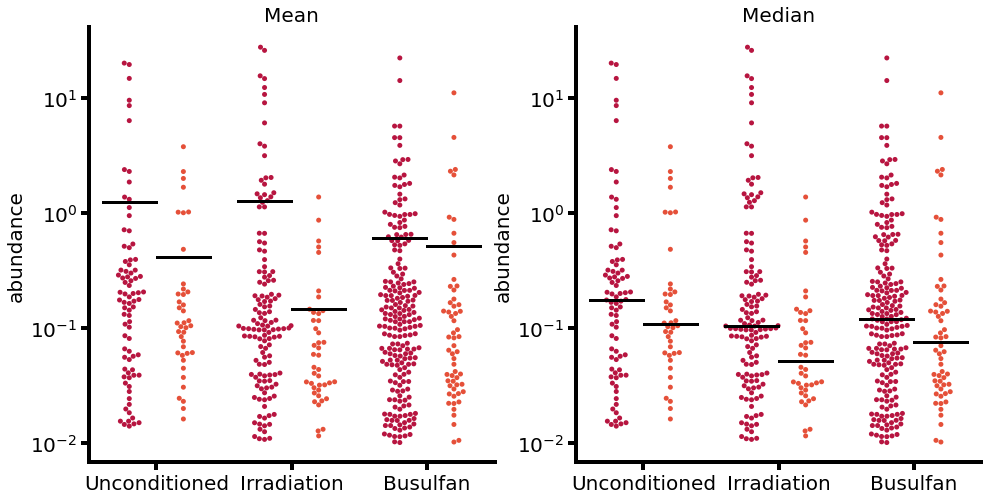

In [11]:
importlib.reload(op)
fig, axes = plt.subplots(ncols=2, figsize=(16,8))

data = data[data.abundance > 0.01]
ax = axes[0]
ax.set_yscale('symlog', linthreshy=.01)
op.dot_line_overlay(
    x='condition',
    y='abundance',
    hue='parent_cell_type',
    hue_order=['hsc', 'mpp'],
    dodge=True,
    data=data,
    ax=ax,
    palette=palette['cell_type'],
    linewidth=3,
    show_mean=True
)
ax.set_xlabel('')
ax.set_title('Mean', fontsize=20)
ax.legend().remove()
fmt.despine_thicken_axes(ax, fontsize=20)

ax = axes[1]
ax.set_yscale('symlog', linthreshy=.01)
op.dot_line_overlay(
    x='condition',
    y='abundance',
    hue='parent_cell_type',
    hue_order=['hsc', 'mpp'],
    dodge=True,
    data=data,
    ax=ax,
    palette=palette['cell_type'],
    linewidth=3,
    show_mean=False
)
ax.legend().remove()
ax.set_xlabel('')
ax.set_title('Median', fontsize=20)
fmt.despine_thicken_axes(ax, fontsize=20);

In [5]:
data.groupby(['condition', 'parent_cell_type', 'cell_type'])['abundance'].describe(percentiles=[.5])

count      mean       std       min  \
condition     parent_cell_type cell_type                                        
Busulfan      hsc              b          114.0  0.486835  1.548011  0.000000   
                               gr          34.0  0.059177  0.164768  0.001088   
                               mo         114.0  0.376624  0.876503  0.000000   
                               t           36.0  0.745508  3.691828  0.000000   
              mpp              b           28.0  0.504301  1.055325  0.000000   
                               gr           8.0  0.062017  0.148524  0.004396   
                               mo          28.0  0.131674  0.214719  0.000000   
                               t           17.0  0.673352  2.678314  0.000000   
Irradiation   hsc              b           81.0  1.433547  4.076496  0.000000   
                               mo          81.0  0.105719  0.179384  0.000000   
                               t           27.0  1.537532  5.506249  0.000000   
              mpp              b           24.0  0.134666  0.296310  0.000000   
                               mo          24.0  0.036589  0.032270  0.000000   
                               t            8.0  0.257539  0.297656  0.040197   
Unconditioned hsc              b           78.0  1.199259  3.794601  0.000000   
                               mo          52.0  0.070358  0.211069  0.000000   
                               t           26.0  0.188835  0.481327  0.000000   
              mpp              b           39.0  0.393668  0.790028  0.000000   
                               mo          26.0  0.011175  0.019998  0.000000   
                               t           13.0  0.061865  0.060229  0.000000   

                                               50%        max  
condition     parent_cell_type cell_type                       
Busulfan      hsc              b          0.056188  14.154097  
                               gr         0.011384   0.949448  
                               mo         0.059890   5.686667  
                               t          0.087529  22.255805  
              mpp              b          0.082415   4.530871  
                               gr         0.008314   0.429354  
                               mo         0.039022   0.876747  
                               t          0.010148  11.065906  
Irradiation   hsc              b          0.096278  25.900390  
                               mo         0.038853   1.125904  
                               t          0.013106  27.606305  
              mpp              b          0.026365   1.373160  
                               mo         0.030909   0.115930  
                               t          0.134507   0.863665  
Unconditioned hsc              b          0.059523  20.073078  
                               mo         0.000027   1.371441  
                               t          0.020611   2.378175  
              mpp              b          0.102291   3.760403  
                               mo         0.000040   0.076498  
                               t          0.059905   0.217399

Text(0.5, 0.98, 'Mean')

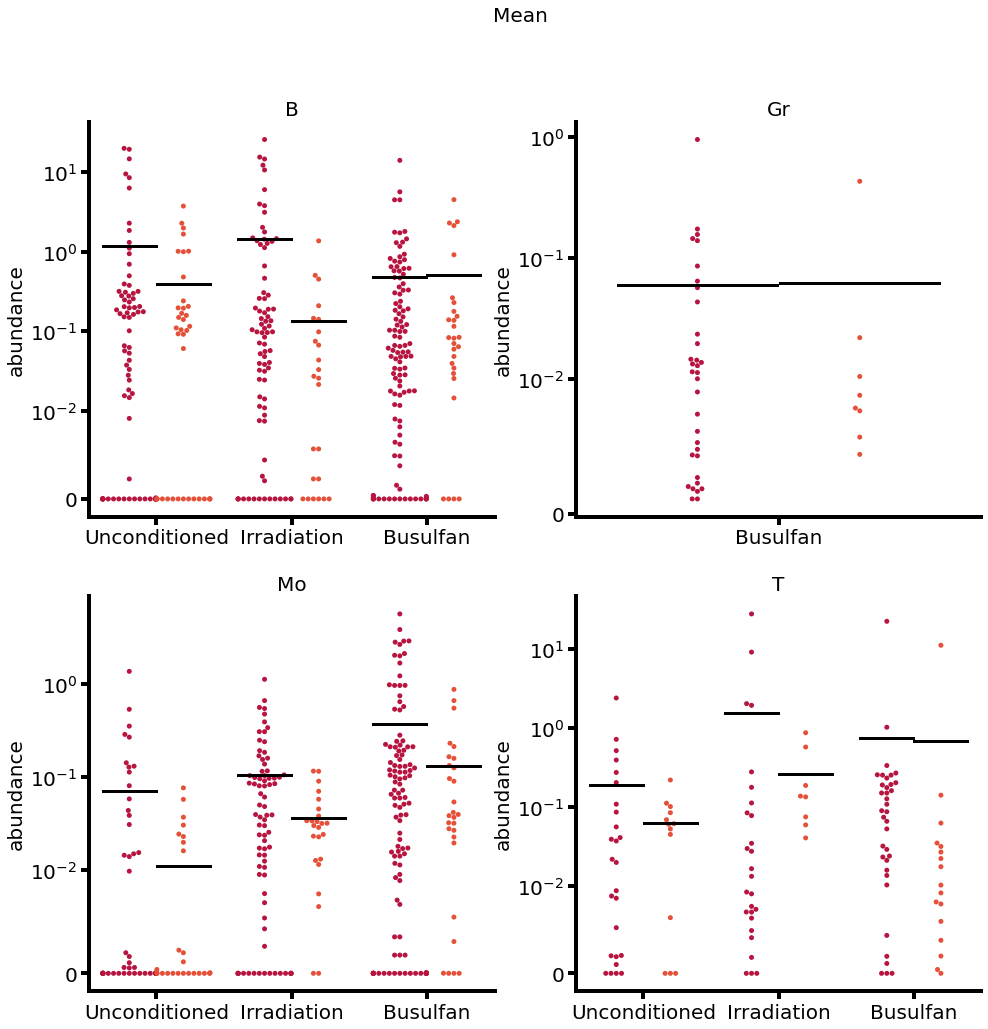

In [8]:
fig, axes = plt.subplots(ncols=2,nrows=2, figsize=(16,16))

for i, (ct, ct_df) in enumerate(data.groupby('cell_type')):
    ax = axes.flatten()[i]
    ax.set_yscale('symlog', linthreshy=.01)
    op.dot_line_overlay(
        x='condition',
        y='abundance',
        hue='parent_cell_type',
        hue_order=['hsc', 'mpp'],
        dodge=True,
        data=ct_df,
        ax=ax,
        palette=palette['cell_type'],
        linewidth=3,
        show_mean=True
    )
    ax.set_xlabel('')
    ax.set_title(ct.title(), fontsize=20)
    ax.legend().remove()
    fmt.despine_thicken_axes(ax, fontsize=20)
plt.suptitle('Mean', fontsize=20)